# Telco Churn Classification Project

# Randy French

# 

# Importing needed essentials

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

import pydataset as data

import prepare
import acquire

# Acquire Data

In [2]:
df = acquire.get_telco_data()

In [3]:
df.shape

(7043, 24)

In [4]:
# geta view of the columns and contents
df.head(5)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,Mailed check,DSL
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,Credit card (automatic),DSL
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,Bank transfer (automatic),DSL
3,1,4,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,Credit card (automatic),DSL
4,1,3,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,Bank transfer (automatic),DSL


In [5]:
# Get summary statistics for numeric columns.
df.describe()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.872923,2.315633,1.690473,0.162147,32.371149,64.761692
std,0.737796,1.148907,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,2.000000,3.000000,2.000000,0.000000,55.000000,89.850000
max,3.000000,4.000000,3.000000,1.000000,72.000000,118.750000


## Acquire Takeaways
- Used a sql query to acquire my data from the Codeup database.
- Bringing in 7043 rows and 24 columns on my initial acquistion.
- Found that mulitple columns will need to be encoded to use binary data.
- I'm importing my get_telco_data function from my acquire.py file that will create a local csv file of my data for future use.

****************************************************************************************************************

# Prepare Data

In [6]:
# Get information about the dataframe: column names, rows, datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

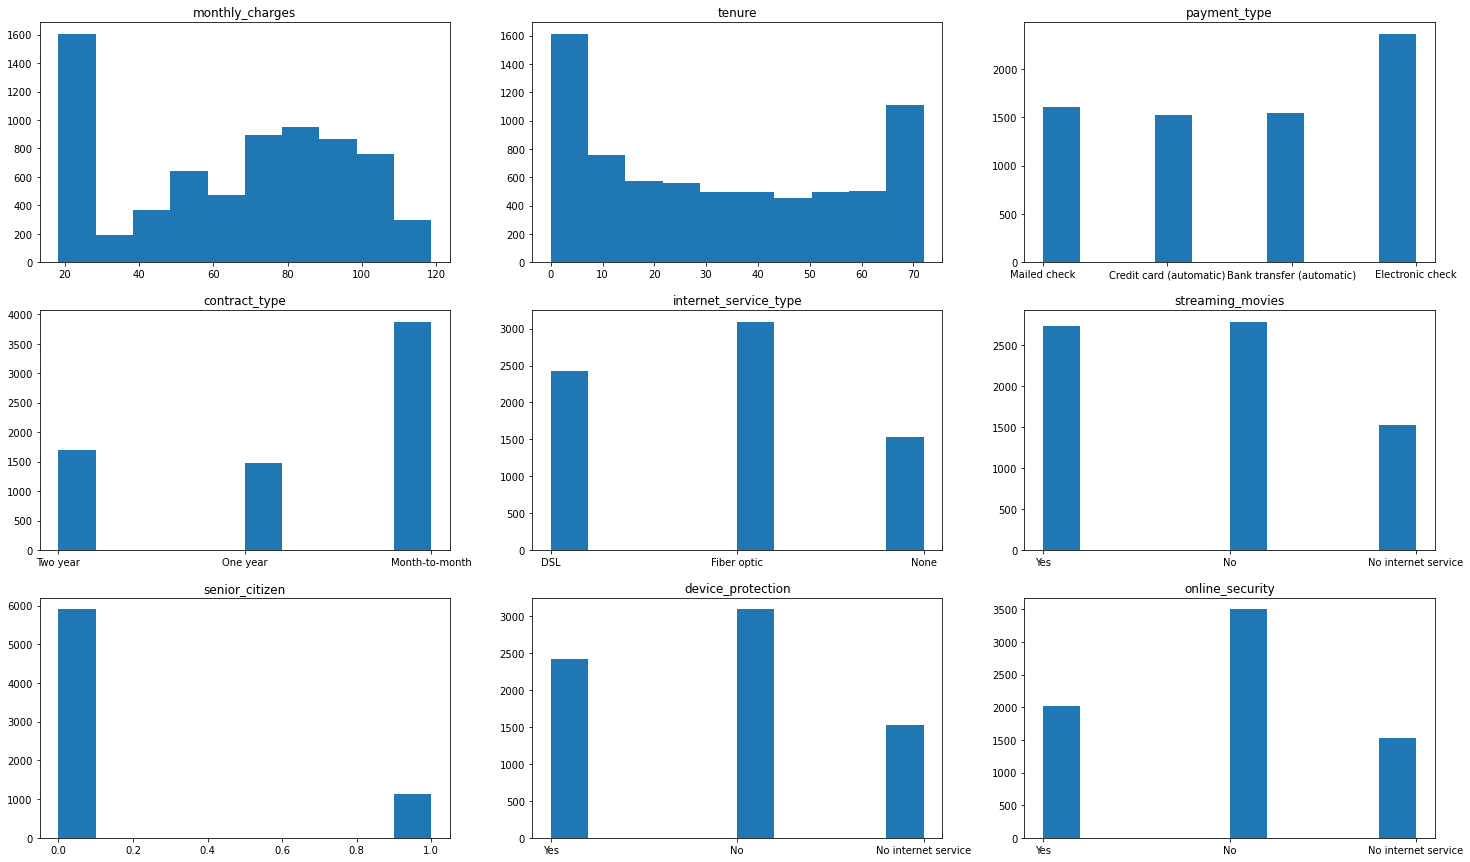

In [7]:
# Check out distributions of numberic columns with subplots of histograms of features

# sets size
plt.subplots(figsize=(25, 15))

plt.subplot(3,3,1);
line1 = plt.hist(df.monthly_charges)
plt.title('monthly_charges');

plt.subplot(3,3,2);
line2 = plt.hist(df.tenure);
plt.title('tenure');

plt.subplot(3,3,3);
line3 = plt.hist(df.payment_type);
plt.title('payment_type');

plt.subplot(3,3,4);
line4 = plt.hist(df.contract_type);
plt.title('contract_type');

plt.subplot(3,3,5);
line1 = plt.hist(df.internet_service_type)
plt.title('internet_service_type');

plt.subplot(3,3,6);
line2 = plt.hist(df.streaming_movies);
plt.title('streaming_movies');

plt.subplot(3,3,7);
line3 = plt.hist(df.senior_citizen);
plt.title('senior_citizen');

plt.subplot(3,3,8);
line4 = plt.hist(df.device_protection);
plt.title('device_protection');

plt.subplot(3,3,9);
line4 = plt.hist(df.online_security);
plt.title('online_security');

In [8]:
# Get summary statistics
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

0734-OXWBT    1
6384-VMJHP    1
3217-FZDMN    1
1222-KJNZD    1
7781-EWARA    1
             ..
5519-YLDGW    1
4086-ATNFV    1
5762-TJXGK    1
9755-JHNMN    1
0547-HURJB    1
Name: customer_id, Length: 7043, dtype: int64
0734-OXWBT    0.000142
6384-VMJHP    0.000142
3217-FZDMN    0.000142
1222-KJNZD    0.000142
7781-EWARA    0.000142
                ...   
5519-YLDGW    0.000142
4086-ATNFV    0.000142
5762-TJXGK    0.000142
9755-JHNMN    0.000142
0547-HURJB    0.000142
Name: customer_id, Length: 7043, dtype: float64
----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Nam

In [9]:
# us the perpare function to clean up the data and encode columns.
df = prepare.prep_telco_data(df)

In [10]:
df.head(3)

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,online_services,streaming_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0016-QLJIS,1,2,3,0,0,1,1,65,1,1,...,1,1,90.45,5957.90,0,2,0,DSL,2,2
0017-DINOC,1,4,3,1,0,0,0,54,0,0,...,1,0,45.20,2460.55,0,2,1,DSL,1,1
0019-GFNTW,1,3,3,0,0,0,0,56,0,0,...,1,0,45.05,2560.10,0,2,1,DSL,2,0


In [11]:
train, validate, test = prepare.telco_split(df)

In [12]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3937, 21)
validate -> (1688, 21)
test -> (1407, 21)


## Prepare Takeaways
- Combined similar columns online_security and online_backup, into one column "online_services" and dropped the individual ones.
- Combined similar columns streaming_tv and streaming_movies, into one column "streaming_services" and dropped the indivdual ones.
- Encoded 15 columns to contain binary data.
- Split my data into train, validate, and test datasets, stratifying on the churn column.

******************************************************************************************************************

# Explore Data

In [13]:
#looking into what drives churn, using the train data set
train.churn.value_counts()

# this shows that out of the 3937 customers in the train data set, 26.66% of customers churn

0    2891
1    1046
Name: churn, dtype: int64

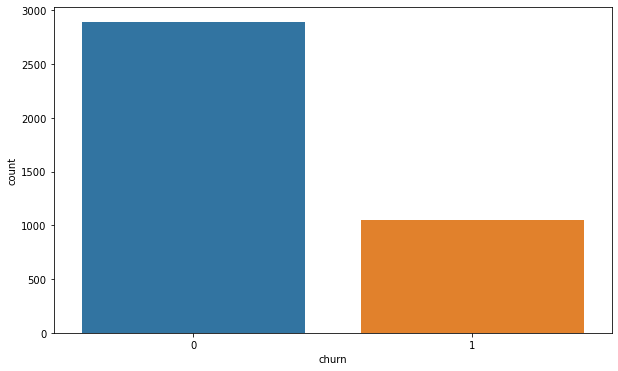

In [14]:
# Visual of the churn on the train data set

plt.figure(figsize=(10,6))
sns.countplot(x='churn', data=train)
plt.show()

In [16]:
telco_correlation = train.corr()
telco_correlation

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,online_services,streaming_services
internet_service_type_id,1.000000,0.013839,0.090193,-0.013853,-0.048237,0.002295,0.047865,-0.041151,0.389138,0.029989,-0.309099,-0.387590,-0.151548,-0.325424,-0.179815,-0.054107,0.090193,-0.033393,-0.441447,-0.282850
payment_type_id,0.013839,1.000000,0.358162,-0.010049,-0.100620,0.135837,0.149079,0.340832,0.006043,0.028999,0.114909,0.165829,-0.116065,-0.066884,0.227899,-0.254138,0.358162,0.901285,0.172874,-0.006066
contract_type_id,0.090193,0.358162,1.000000,-0.016134,-0.139793,0.310281,0.246930,0.679196,0.008218,0.117470,0.228818,0.309558,-0.164500,-0.055473,0.460345,-0.400168,1.000000,0.331213,0.272491,0.127983
gender,-0.013853,-0.010049,-0.016134,1.000000,-0.001378,-0.001221,-0.001645,0.007683,-0.027566,-0.004093,-0.016430,-0.003042,-0.002305,-0.009844,0.000279,0.005866,-0.016134,-0.016551,-0.003503,-0.008003
senior_citizen,-0.048237,-0.100620,-0.139793,-0.001378,1.000000,0.019339,-0.212460,0.016071,0.004428,0.140615,0.055236,-0.061434,0.165636,0.220475,0.094484,0.167749,-0.139793,-0.034754,0.035094,0.132223
partner,0.002295,0.135837,0.310281,-0.001221,0.019339,1.000000,0.456445,0.390546,0.003623,0.128751,0.158869,0.126241,-0.025318,0.087960,0.313955,-0.148287,0.310281,0.159551,0.181627,0.139956
dependents,0.047865,0.149079,0.246930,-0.001645,-0.212460,0.456445,1.000000,0.169495,0.001674,-0.026156,0.026943,0.057214,-0.133115,-0.107817,0.065545,-0.165528,0.246930,0.118267,0.077319,-0.035043
tenure,-0.041151,0.340832,0.679196,0.007683,0.016071,0.390546,0.169495,1.000000,-0.000353,0.330175,0.376768,0.338505,0.017345,0.260740,0.827061,-0.340800,0.679196,0.399268,0.449244,0.338675
phone_service,0.389138,0.006043,0.008218,-0.027566,0.004428,0.003623,0.001674,-0.000353,1.000000,0.280078,-0.082817,-0.088467,-0.004963,0.242779,0.109057,-0.003177,0.008218,0.012428,-0.075187,-0.049443
multiple_lines,0.029989,0.028999,0.117470,-0.004093,0.140615,0.128751,-0.026156,0.330175,0.280078,1.000000,0.198337,0.096158,0.154765,0.491332,0.463428,0.038191,0.117470,0.112550,0.199377,0.298778


In [17]:
# seeing that monthly charges and senior citizen are 2nd and 3rd, will take a look at them further.
telco_correl_churn = telco_correlation['churn'].sort_values(ascending=False)
telco_correl_churn

churn                       1.000000
paperless_billing           0.190369
monthly_charges             0.189112
senior_citizen              0.167749
streaming_services          0.065096
multiple_lines              0.038191
gender                      0.005866
phone_service              -0.003177
internet_service_type_id   -0.054107
device_protection          -0.068500
partner                    -0.148287
online_services            -0.160096
dependents                 -0.165528
tech_support               -0.169062
payment_type               -0.192159
total_charges              -0.193060
payment_type_id            -0.254138
tenure                     -0.340800
contract_type              -0.400168
contract_type_id           -0.400168
Name: churn, dtype: float64

In [31]:
# determine how many are senior citizens and how many are not
train.senior_citizen.value_counts()

#this shows that out of the 3937 customers in the train dataset that 16.43% are senior citizens

0    3290
1     647
Name: senior_citizen, dtype: int64

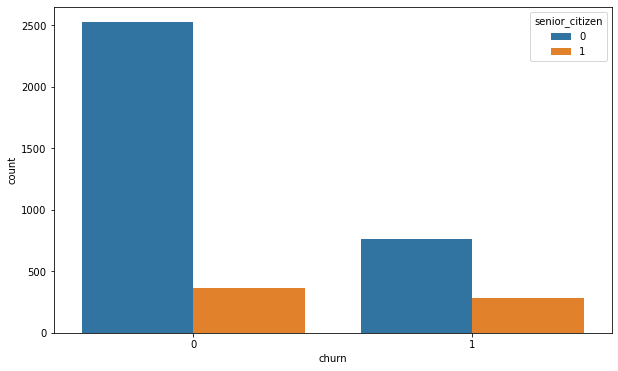

In [30]:
# plot shows senior citizen (1) verses non-senior citizen (0)
# those who churn 1 vs those who do not churn (0)

plt.figure(figsize=(10,6))
sns.countplot(x='churn', hue='senior_citizen', data=train)
plt.show()

### Hypothesis 1: Determine if there is a relationship between being a senior citizen and churn.
- alpha = .05

- $H_0$: There is no relationship between being a senior citizen and churn.

- $H_a$: There is a relationship between being a senior citizen and churn. 

In [18]:
#set alpha to .05
alpha = .05

In [19]:
observed = pd.crosstab(train.churn, train.senior_citizen)
observed

senior_citizen,0,1
churn,,
0,2524,367
1,766,280


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(109.76347560274587, 1.1040911367340458e-25)

In [32]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.5f}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         There is a relationship between being a senior citizen and churn.''')
else:
    print('We cannot reject the null hypothesis')

Observed:

payment_type     0     1
churn                   
0             1460  1431
1              754   292
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

payment_type            0            1
churn                                 
0             1625.774448  1265.225552
1              588.225552   457.774448
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 144.4991
p value: 0.00000
Our p value is less than our alpha and we can reject the null hypothesis
         There is a relationship between being a senior citizen and churn.


### Hypothesis 2: Determine if there is a relationship between payment type and churn.

- alpha = .05

- $H_0$: There is no relationship between payment type and churn, they are independent.
- $H_a$: There is a relationship between payment type and churn, they are dependent on each other.

In [22]:
observed = pd.crosstab(train.churn, train.payment_type)
observed

payment_type,0,1
churn,,
0,1460,1431
1,754,292


In [23]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(144.4990535330328, 2.7636405346522426e-33)

In [24]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.5f}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         There is a relationship between payment type and churn, they are dependent on each other.''')
else:
    print('We cannot reject the null hypothesis')

Observed:

payment_type     0     1
churn                   
0             1460  1431
1              754   292
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

payment_type            0            1
churn                                 
0             1625.774448  1265.225552
1              588.225552   457.774448
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 144.4991
p value: 0.00000
Our p value is less than our alpha and we can reject the null hypothesis
         There is a relationship between payment type and churn, they are dependent on each other.


### Takeaways of the Explore process:
- In looking at seinor citizens churning, found that they are dependent.
- In looking at electronic and mailing checks for payment, are dependent.

# Model and Evaluate 

In [25]:
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [26]:
train['baseline_pred'] = 0

In [27]:
baseline_accuracy = (train.churn == train.baseline_pred).mean()
print(f'The baseline accuracy is: {baseline_accuracy:.2%}')

The baseline accuracy is: 73.43%
